In [10]:
import keras                       # import keras using tf backend
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set root directorty of all MNIST models
model_root_dir = '/notebooks/my-notebooks/MNIST/'

# get data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(model_root_dir+'MNIST_data', one_hot=True)

Extracting /notebooks/my-notebooks/MNIST/MNIST_data/train-images-idx3-ubyte.gz
Extracting /notebooks/my-notebooks/MNIST/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /notebooks/my-notebooks/MNIST/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /notebooks/my-notebooks/MNIST/MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
image_size = 28
num_classes = 10

batch_size = 100
learning_rate = 0.2
dropout_rate = 0.4

epochs = 2

In [4]:
x_train, y_train = mnist.train.images.reshape(-1,image_size,image_size,1), mnist.train.labels
x_val, y_val = mnist.validation.images.reshape(-1,image_size,image_size,1), mnist.validation.labels
x_test, y_test = mnist.test.images.reshape(-1,image_size,image_size,1), mnist.test.labels

In [5]:
# reset session to rebuild model without building another one
keras.backend.clear_session()

# create model
model = keras.models.Sequential()

# define convolutional layer 1 with relu
model.add(keras.layers.Conv2D(filters=8, kernel_size=(5,5), activation='relu', input_shape=(image_size,image_size,1)))
# add a max pooling layer
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

# define convolutional layer 2 with relu
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
# add a max pooling layer
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

# flatten
model.add(keras.layers.Flatten())

# add a hidden fully connected layer
model.add(keras.layers.Dense(units=256, activation='relu'))
# add dropout
model.add(keras.layers.Dropout(rate=dropout_rate))

# add output fc layer
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

# show model structure
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
__________

In [6]:
# define loss function
# define optimizer
# also return accuracy as a performance metric
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=learning_rate),
              metrics=['accuracy'])

In [7]:
# train model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 6s 116us/step - loss: 0.2870 - acc: 0.9078 - val_loss: 0.0730 - val_acc: 0.9798
Epoch 2/2
55000/55000 [==============================] - 4s 74us/step - loss: 0.0910 - acc: 0.9715 - val_loss: 0.0576 - val_acc: 0.9820


In [8]:
# show evaluation accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', str(round(100*score[1],2))+'%')

Test accuracy: 98.51%


prediction: 2 answer: 2
0 0.001%
1 0.117%
2 99.854%
3 0.003%
4 0.0%
5 0.0%
6 0.023%
7 0.0%
8 0.002%
9 0.0%


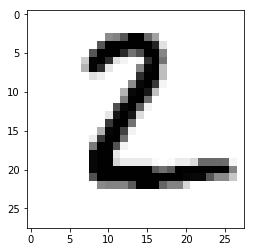

prediction: 6 answer: 6
0 0.001%
1 0.0%
2 0.0%
3 0.0%
4 0.0%
5 0.0%
6 99.999%
7 0.0%
8 0.0%
9 0.0%


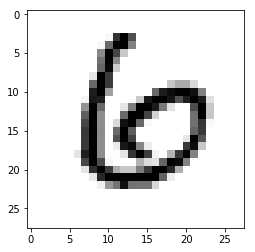

In [9]:
# test and show test images
test_idxs = [1,11]

for test_idx in test_idxs:
    test_x, test_y = mnist.test.images[test_idx].reshape(1,image_size,image_size,1), mnist.test.labels[test_idx].reshape(1,-1)

    _prediction = model.predict(test_x)

    print('prediction:', np.argmax(_prediction), 'answer:', np.argmax(test_y))

    for i,val in enumerate(_prediction[0]):
        print(i, str(round((100*val),3))+'%')

    plt.imshow(test_x.reshape(image_size,image_size), cmap='binary')
    plt.show()